<a href="https://colab.research.google.com/github/pierce-s/MAT-421/blob/main/Module_H_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Pierce Sarmiento

---

#**Module H - 2** 
**22.4** Numerical Error and Instability

**22.5** Predictor-Corrector Methods

**22.6** Python ODE Solvers (IVP)


---


**Section 22.4: Numerical Error and Instability**

*Summary:*

Depending on our numerical methodology, we may find issues with accuracy and stability when solving ODEs. We want to minimize error between our numerical solution and exact solution, including when we continue to integrate.


---


*Implementation:*

To illustrate the difference in accuracy between different methods, let's use Euler Explicit, Euler Implicit, and Trapezoidal Formulas. First, we consider the function $f(y) = -100y$ with respect to time `t`.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# the ODE
def f(y):
    return -100*y

# time interval and step size
t0 = 0
tf = 1
h = 0.01

# initial condition
y0 = 1

# number of time steps
N = int((tf - t0) / h)

Next, we implement our various numerical methods:

In [17]:
# Initialize arrays
y_euler_explicit = np.zeros(N+1)
y_euler_implicit = np.zeros(N+1)
y_trapezoidal = np.zeros(N+1)

# initial condition
y_euler_explicit[0] = y0
y_euler_implicit[0] = y0
y_trapezoidal[0] = y0

# Solve the ODE
for i in range(N):
    # Euler Explicit
    y_euler_explicit[i+1] = y_euler_explicit[i] + h*f(y_euler_explicit[i])
    
    # Euler Implicit
    y_euler_implicit[i+1] = y_euler_implicit[i] / (1 + 100*h)
    
    # Trapezoidal
    y_trapezoidal[i+1] = (y_trapezoidal[i] + h/2*(f(y_trapezoidal[i]) + f(y_trapezoidal[i+1]))) / (1 + 50*h)




We can also compute the exact solution for comparison's sake:

In [18]:
# exact solution
t = np.linspace(t0, tf, N+1)
y_exact = np.exp(-100*t)

Lastly, let's plot each method against the exact solution for comparison.

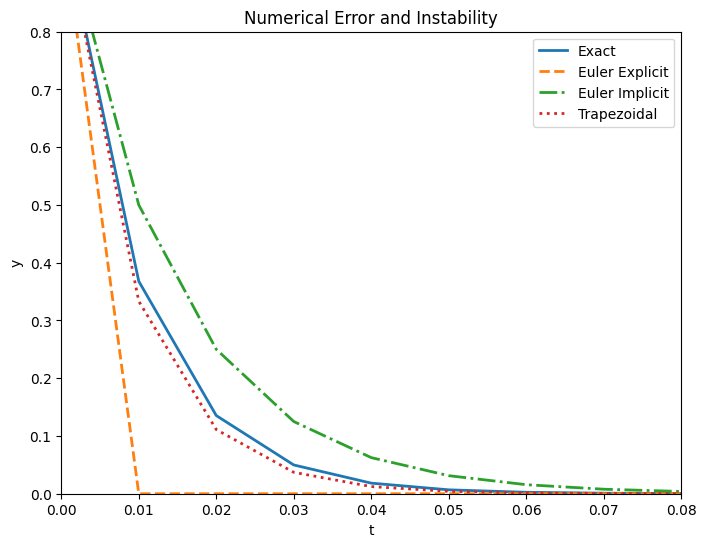

In [19]:
# Plot the solutions
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t, y_exact, label='Exact', linewidth=2)
ax.plot(t, y_euler_explicit, label='Euler Explicit', linestyle='--', linewidth=2)
ax.plot(t, y_euler_implicit, label='Euler Implicit', linestyle='-.', linewidth=2)
ax.plot(t, y_trapezoidal, label='Trapezoidal', linestyle=':', linewidth=2)
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Numerical Error and Instability')
ax.legend()
ax.set_xlim([0, 0.08])
ax.set_ylim([0, 0.8])
plt.show()

Here we see that in thise case the trapezoidal method was more accurate than the two Euler methods.

**Section 22.5: Predictor-Corrector Methods**

*Summary:*

The predictor-corrector method is another technique used to improve the accuracy of numerical solutions. We use two formulas: a predictor and a corrector. The predictor formula uses an explicit formula to estimate the solution at the next time step. Then, the corrector formula uses the predicted solution to calculate a new, more accurate solution by applying an implicit formula.

---


*Implementation:*

Let's use the same setup as the previous section:



In [20]:
import numpy as np
import matplotlib.pyplot as plt

# the ODE
def f(t, y):
    return -100*y

# time interval and step size
t0 = 0
tf = 1
h = 0.01

# initial condition
y0 = 1

# time steps
N = int((tf - t0) / h)

This time we can implement the midpoint method  as a predictor-corrector:

In [21]:
# Initialize arrays
t = np.zeros(N+1)
y = np.zeros(N+1)

# initial condition
t[0] = t0
y[0] = y0

# Solve the ODE
for i in range(N):
    # Predictor step using midpoint method
    tp = t[i] + h/2
    yp = y[i] + h/2 * f(t[i], y[i])
    
    # Corrector step using midpoint method
    y[i+1] = y[i] + h * f(tp, yp)
    t[i+1] = t[i] + h


Again, we can implement the exact method for comparison:

In [22]:
# exact solution
t_exact = np.linspace(t0, tf, 100)
y_exact = np.exp(-100*t_exact)

Finally, we plot for comparison.

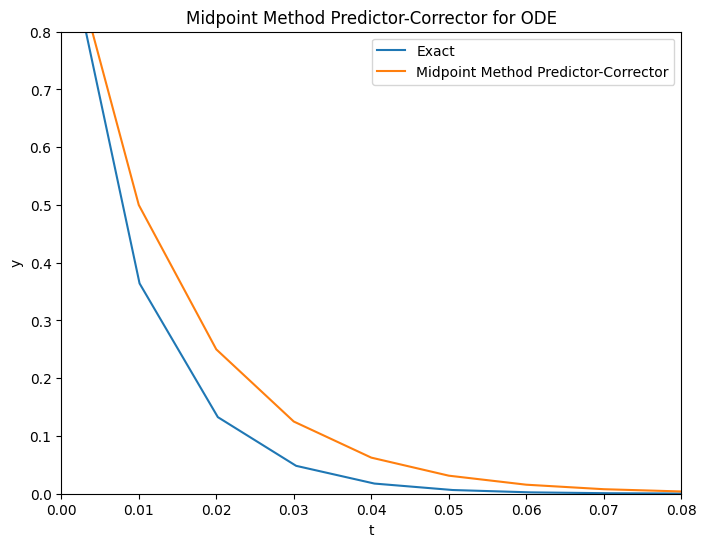

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t_exact, y_exact, label='Exact')
ax.plot(t, y, label='Midpoint Method Predictor-Corrector')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Midpoint Method Predictor-Corrector for ODE')
ax.legend()
ax.set_xlim([0, 0.08])
ax.set_ylim([0, 0.8])
plt.show()

Alternatively, we can use the Runge Kutta method, which we have shown in previous sections.



**Section 22.6: Python ODE Solvers (IVP)**

*Summary:*

There are various methods we can use to solve ODEs in Python, one of which is `scipy`'s `solve_ivp`.

---


*Implementation:*

Let's try using `solve_ivp` for the same task.

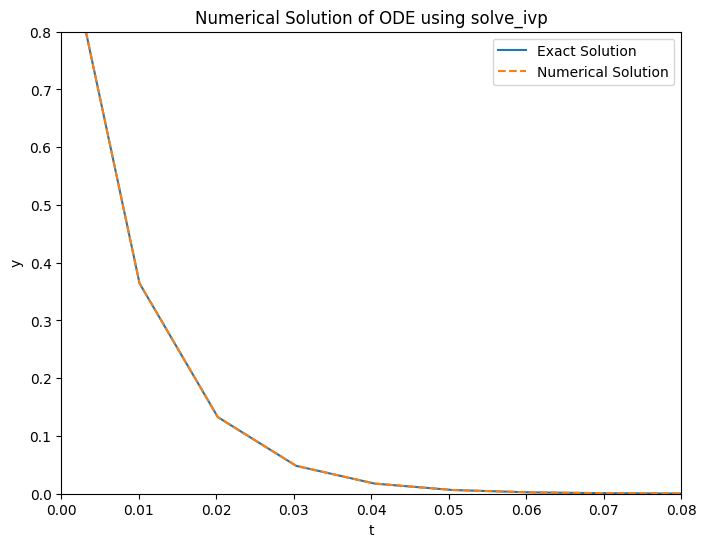

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# the ODE
def f(t, y):
    return -100*y

#  time interval and initial condition
t_span = (0, 1)
y0 = [1]

# Solve the ODE (using solve_ivp)
sol = solve_ivp(f, t_span, y0, method='RK45', t_eval=np.linspace(0, 1, 100))

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(sol.t, np.exp(-100*sol.t), label='Exact Solution')
ax.plot(sol.t, sol.y[0], linestyle='--', label='Numerical Solution')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Numerical Solution of ODE using solve_ivp')
ax.legend()
ax.set_xlim([0, 0.08])
ax.set_ylim([0, 0.8])
plt.show()

The resulting plot shows that we can get very close to the exact solution using this built-in method. While the `solve_ivp` is convenient and in this case more accurate, by building our own implementations we have more control over the calculations. `solve_ivp` takes an adaptive approach which solves a wide variety of ODEs, but can only solve first-order ODEs and may not be as fast or efficient.
